### DataLoader

Directory structure like below:

    ./datasets
        - VGGFACE2
            - train
                - raw
                    - n000810
                    - n000001
                    - ...
                - 4
                - 8
                - ...
                - all_filtered_results.csv
                - all_loose_landmarks_256.csv
            - identity_info.csv

Make merged csv file.

!python csv_merger.py

Make images having various resolutions.

!python image_generator.py

Load dataloader

In [49]:
import torch
from torchvision import transforms
from torch.utils.data import DataLoader

import pandas as pd
import matplotlib.pyplot as plt

from util.datasets import *
from util.datasets import VGGFace2Dataset
from util.custom_transforms import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
transform = transforms.Compose([Normalize(0.5, 0.5),
                                PolygonMask(2),
                                ToTensor()])

In [51]:
dataset = VGGFace2Dataset('./dataset/VGGFACE2/train',
                          256, 
                          './dataset/VGGFACE2/train/all_loose_landmarks_256.csv',
                          './dataset/VGGFACE2/identity_info.csv',
                          './dataset/VGGFACE2/train/all_filtered_results.csv',
                          False,
                          transform)

In [52]:
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [58]:
sample = iter(dataloader).next()

In [59]:
sample['fake_gender']

tensor([ 2,  1])

In [60]:
sample['gender']

tensor([ 2,  2])

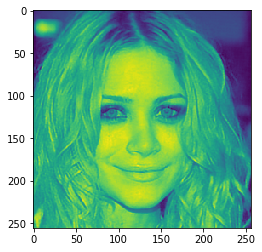

In [61]:
plt.imshow(sample['image'].numpy()[0,0,:,:])

In [62]:
sample['obs_mask'].shape

torch.Size([2, 1, 256, 256])

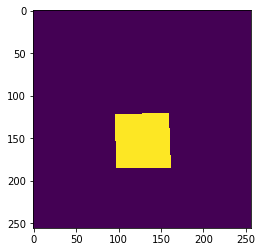

In [63]:
plt.imshow(sample['real_mask'][0,0,:,:])d